In [1]:
import sys,os,os.path
sys.path.append("/Users/user/Desktop/PhD/Repositories/IC/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
if not os.environ.get("ICTDIR"):
    os.environ["ICTDIR"] = "/Users/user/Desktop/PhD/Repositories/IC"

import invisible_cities.core.core_functions as     coref
import invisible_cities.io  .dst_io         as     dstio
from invisible_cities.io.pmaps_io import load_pmaps
from invisible_cities.io.pmaps_io import load_pmaps_as_df
from invisible_cities.database.load_db  import DataPMT, DataSiPM


from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [8, 6]
rcParams['font.size'] = 15


import re
import glob
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
import tables

from scipy.spatial import cKDTree
import matplotlib.patches as patches
import matplotlib.colors as mcolors
from   invisible_cities.database               import load_db

from invisible_cities.io.pmaps_io import load_pmaps
from invisible_cities.io.pmaps_io import load_pmaps_as_df

import tables as tb

from sklearn.linear_model import RANSACRegressor
from scipy.stats import skewnorm, norm
from scipy.optimize import fsolve
 

In [9]:
psf_15539 = pd.read_hdf('/Users/user/Desktop/PhD/NEXT/NEXT_testing/PSF_from_pmaps/PSF_data/z100_xy2.0/PSF_15539_z100_xy2.0_130125.psf', "/PSF/PSFs")
psf_15539_ldc1 = pd.read_hdf('/Users/user/Desktop/PhD/NEXT/NEXT_testing/PSF_from_pmaps/PSF_data/z100_xy2.0/PSF_15539_ldc_1_z100_xy2.0.psf', "/PSF/PSFs")
psf_15539_ldc2 = pd.read_hdf('/Users/user/Desktop/PhD/NEXT/NEXT_testing/PSF_from_pmaps/PSF_data/z100_xy2.0/PSF_15539_ldc_2_z100_xy2.0.psf', "/PSF/PSFs")
psf_15539_ldc3 = pd.read_hdf('/Users/user/Desktop/PhD/NEXT/NEXT_testing/PSF_from_pmaps/PSF_data/z100_xy2.0/PSF_15539_ldc_3_z100_xy2.0.psf', "/PSF/PSFs")
psf_15539_ldc4 = pd.read_hdf('/Users/user/Desktop/PhD/NEXT/NEXT_testing/PSF_from_pmaps/PSF_data/z100_xy2.0/PSF_15539_ldc_4_z100_xy2.0.psf', "/PSF/PSFs")

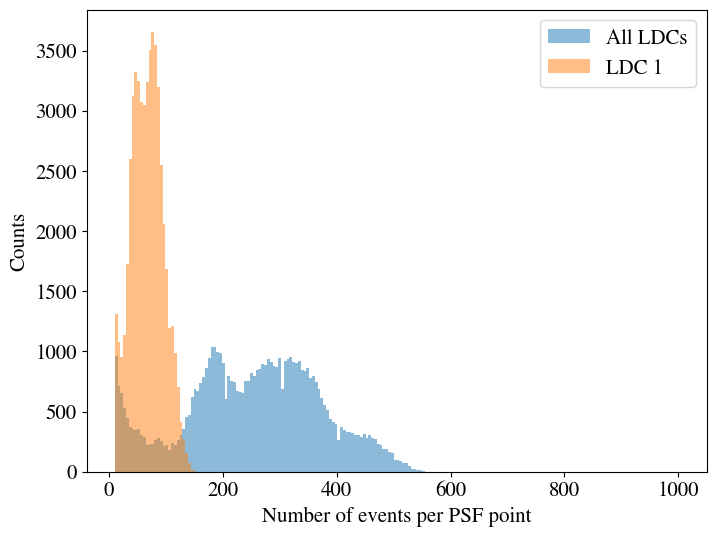

In [3]:
plt.hist(psf_15539.nevt, bins=200, alpha=0.5, label='All LDCs', range=(10,1000))
plt.hist(psf_15539_ldc1.nevt, bins=200, alpha=0.5, label='LDC 1', range=(10,1000))
#plt.hist(psf_15539_ldc2.nevt, bins=200, alpha=0.5, label='LDC 2', range=(10,1000))
#plt.hist(psf_15539_ldc3.nevt, bins=200, alpha=0.5, label='LDC 3', range=(10,1000))
#plt.hist(psf_15539_ldc4.nevt, bins=200, alpha=0.5, label='LDC 4', range=(10,1000)) 

plt.xlabel('Number of events per PSF point')
plt.ylabel('Counts')
plt.legend()

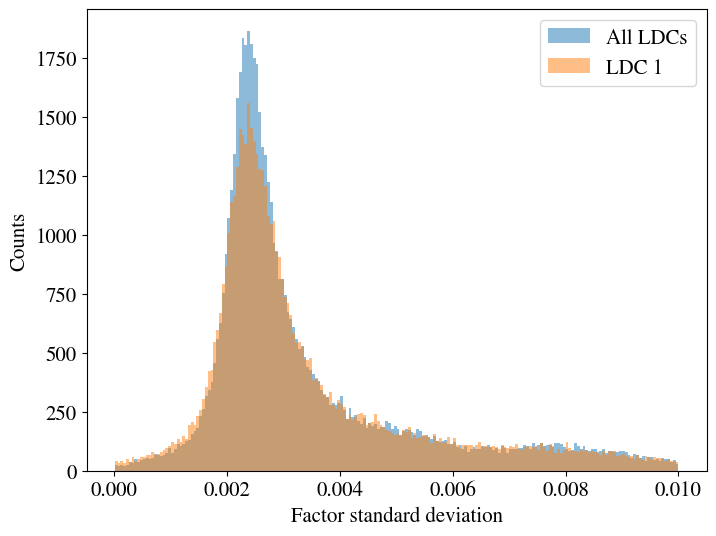

In [4]:
plt.hist(psf_15539.factor_std, bins=200, alpha=0.5, label='All LDCs', range=(0.00001,0.01))
plt.hist(psf_15539_ldc1.factor_std, bins=200, alpha=0.5, label='LDC 1', range=(0.00001,0.01))
#plt.hist(psf_15539_ldc2.factor_std, bins=200, alpha=0.5, label='LDC 2', range=(0.00001,0.01))
#plt.hist(psf_15539_ldc3.factor_std, bins=200, alpha=0.5, label='LDC 3', range=(0.00001,0.01))
#plt.hist(psf_15539_ldc4.factor_std, bins=200, alpha=0.5, label='LDC 4', range=(0.00001,0.01)) 

plt.xlabel('Factor standard deviation')
plt.ylabel('Counts')
plt.legend()

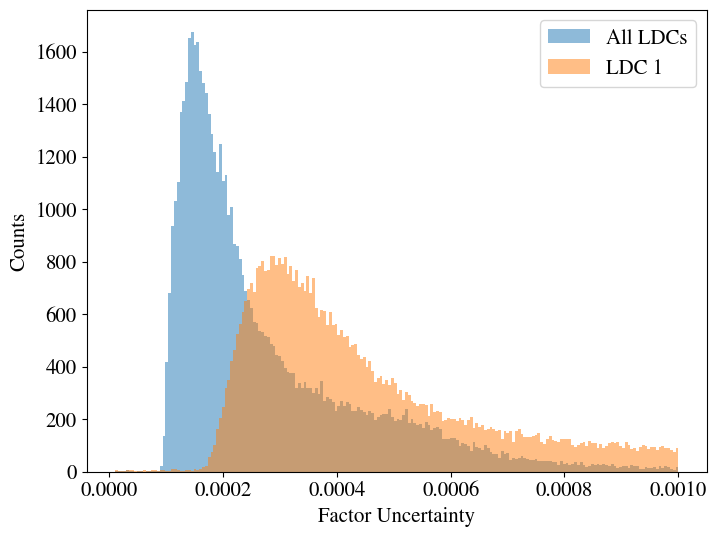

In [16]:
plt.hist(psf_15539.factor_unc, bins=200, alpha=0.5, label='All LDCs', range=(0.00001,0.001))
plt.hist(psf_15539_ldc1.factor_unc, bins=200, alpha=0.5, label='LDC 1', range=(0.00001,0.001))
#plt.hist(psf_15539_ldc2.factor_std, bins=200, alpha=0.5, label='LDC 2', range=(0.00001,0.01))
#plt.hist(psf_15539_ldc3.factor_std, bins=200, alpha=0.5, label='LDC 3', range=(0.00001,0.01))
#plt.hist(psf_15539_ldc4.factor_std, bins=200, alpha=0.5, label='LDC 4', range=(0.00001,0.01)) 

plt.xlabel('Factor Uncertainty')
plt.ylabel('Counts')
plt.legend()

In [25]:
psf_15539_ldc2

,xr,yr,zr,x,y,z,factor,factor_std,factor_unc,nevt
0,-99.0,-99.0,0,0,0,100.0,0.0,0.0,0.0,0.0
1,-99.0,-97.0,0,0,0,100.0,0.0,0.0,0.0,0.0
2,-99.0,-95.0,0,0,0,100.0,0.0,0.0,0.0,0.0
3,-99.0,-93.0,0,0,0,100.0,0.0,0.0,0.0,0.0
4,-99.0,-91.0,0,0,0,100.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59995,99.0,91.0,0,0,0,1100.0,0.0,0.0,0.0,0.0
59996,99.0,93.0,0,0,0,1100.0,0.0,0.0,0.0,0.0
59997,99.0,95.0,0,0,0,1100.0,0.0,0.0,0.0,0.0
59998,99.0,97.0,0,0,0,1100.0,0.0,0.0,0.0,0.0


In [ ]:

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))


def run_psfs(psfs):
    
    alongx = psfs.loc[lambda df: df.yr==1]
    
    results = []
    
    for z, zpsf in alongx.groupby("z"):

        plt.figure()
        psf = psfs.loc[lambda df: df.z == z]
        nx = psf.xr.unique().size
        ny = psf.yr.unique().size
        matrix  = psf.factor.values.reshape(nx, ny)
        xyrange = (psf.xr.min(), psf.xr.max())
        plt.imshow(matrix,
                   extent=(*xyrange, *xyrange),
                   origin="lower",
                   aspect="equal",
                   cmap="viridis")
        plt.xlabel("xr (mm)")
        plt.ylabel("yr (mm)")
        plt.xlim(-80, 80)
        plt.ylim(-80, 80)
        cbar = plt.colorbar(fraction=0.046, pad=0.04)
        cbar.set_label("Charge fraction", fontsize=16)
        cbar.ax.tick_params(labelsize=14)
        plt.legend(title=f"z: {z-50:.0f} - {z+50:.0f} mm")

        plt.figure()

        zpsf_sorted = zpsf.sort_values("xr")
        x_positions = zpsf_sorted.xr.values     
        charge_fraction = zpsf_sorted.factor.values  
        charge_fraction_unc = zpsf_sorted.factor_unc.values

        # Step plot using actual positions
        plt.step(x_positions, charge_fraction, where='mid', color='black', linewidth=1.3)

        threshold = 0.015
        mask = charge_fraction > threshold
        x_positions_fit = x_positions[mask]
        charge_fraction_fit = charge_fraction[mask]
        charge_fraction_unc_fit = charge_fraction_unc[mask]

        p0 = [charge_fraction_fit.max(), x_positions_fit[np.argmax(charge_fraction_fit)], 5.0]
        popt, pcov = curve_fit(
            gaussian,
            x_positions_fit,
            charge_fraction_fit,
            p0=p0,
            sigma=charge_fraction_unc_fit,
            absolute_sigma=True
        )
        A, mu, sigma = popt
        sigma_err = np.sqrt(pcov[2,2])  # uncertainty on sigma
        variance = sigma**2
        variance_err = 2 * sigma * sigma_err

        # plot gaussian fit
        x_dense = np.linspace(x_positions_fit.min(), x_positions_fit.max(), 1000)
        plt.plot(x_dense, gaussian(x_dense, *popt), color="red", linewidth=1.5)
        plt.errorbar(x_positions_fit, charge_fraction_fit, yerr=charge_fraction_unc_fit, fmt='o', color='blue', markersize=0, capsize=2, elinewidth=1, alpha=0.5)
    
        plt.xlabel("xr (mm)")
        plt.ylabel("Charge fraction")
        plt.legend(title=f"z: {z-50:.0f} - {z+50:.0f} mm")
        plt.xlim(-80, 80)
        plt.show()
        
        
        print(sigma**2)
        drift_velocity = 0.87
        drift_time = z / drift_velocity
        results.append((z, drift_time, variance, variance_err))

    return pd.DataFrame(results, columns=["z_value", "drift_time", "variance", "variance_err"])




No handles with labels found to put in legend.
No handles with labels found to put in legend.


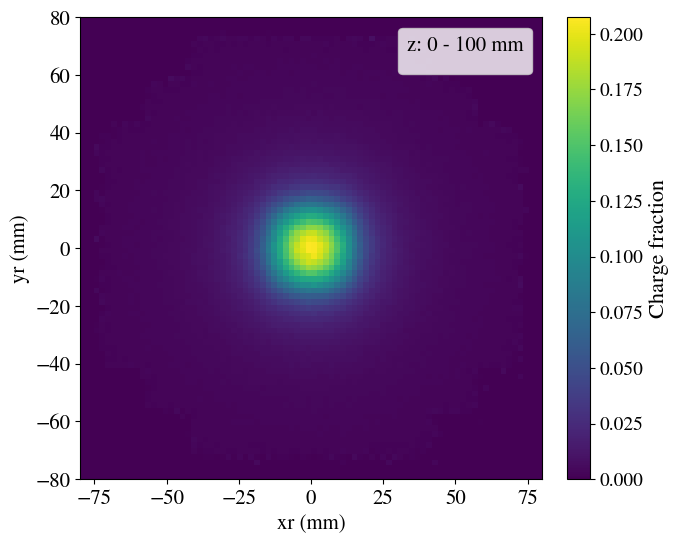

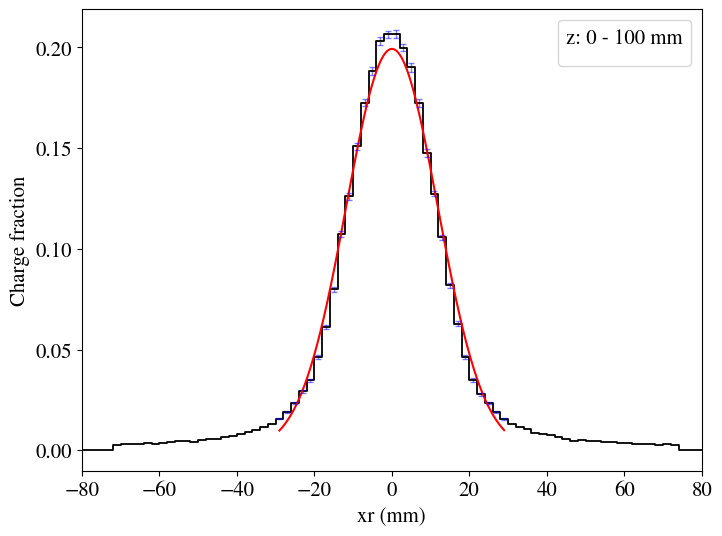

No handles with labels found to put in legend.
No handles with labels found to put in legend.


139.7592539775734


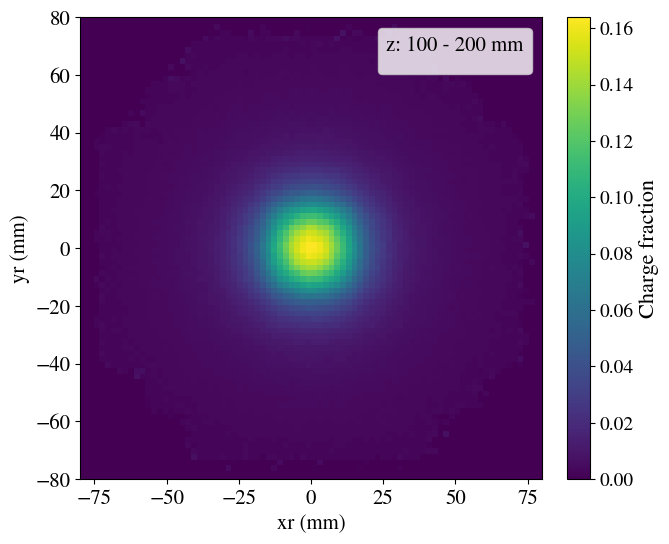

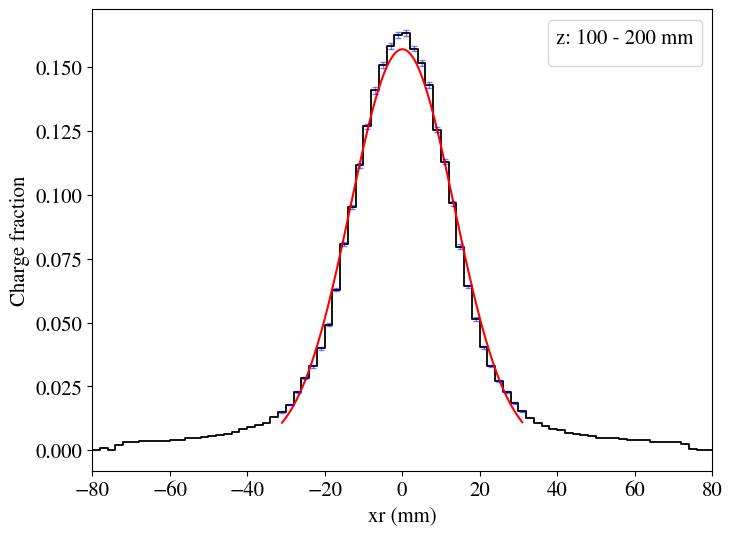

No handles with labels found to put in legend.
No handles with labels found to put in legend.


179.8798324321467


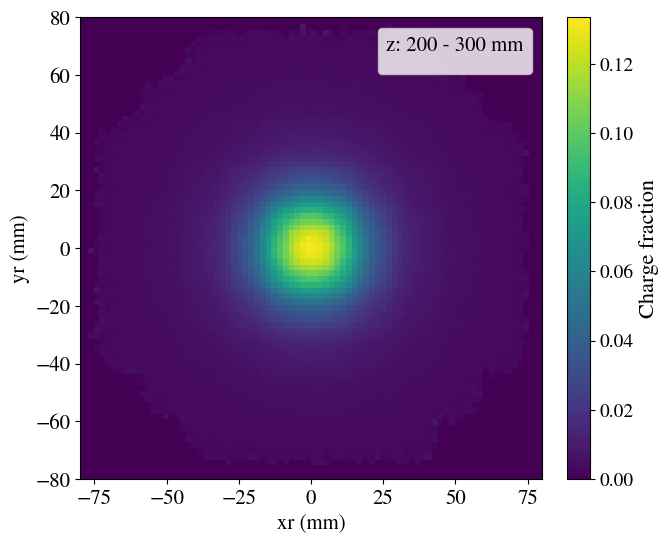

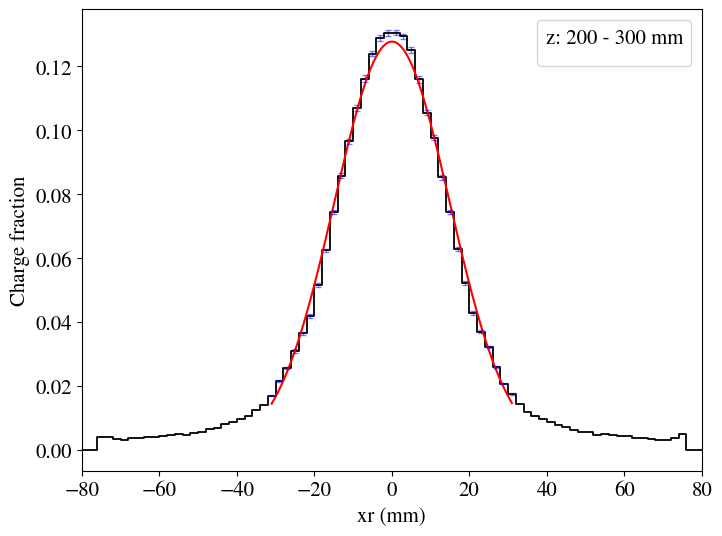

No handles with labels found to put in legend.
No handles with labels found to put in legend.


221.81892102230572


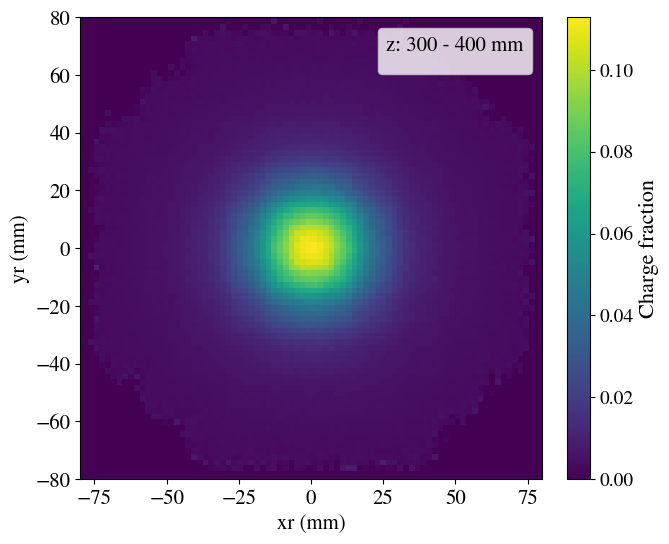

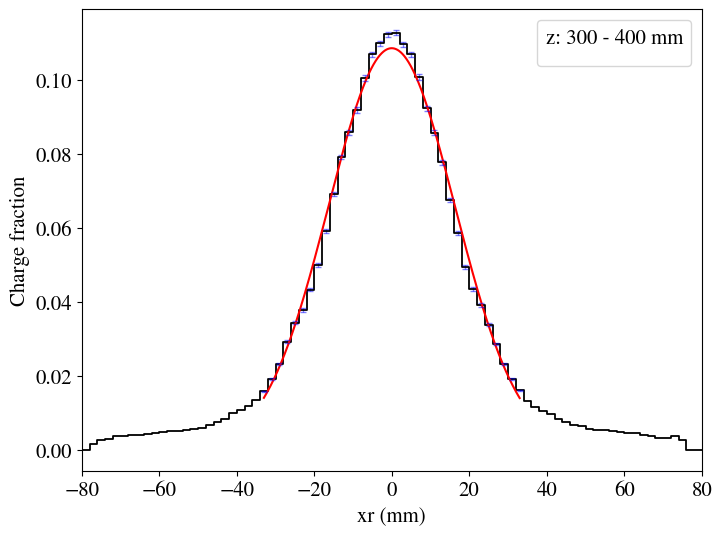

No handles with labels found to put in legend.
No handles with labels found to put in legend.


266.8704498261422


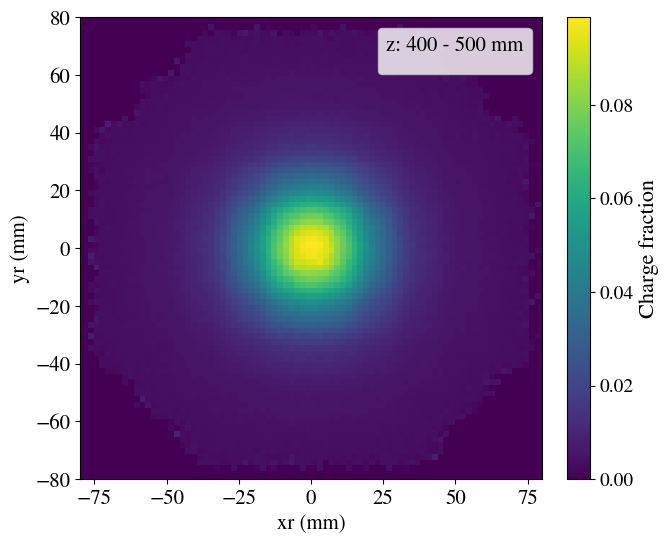

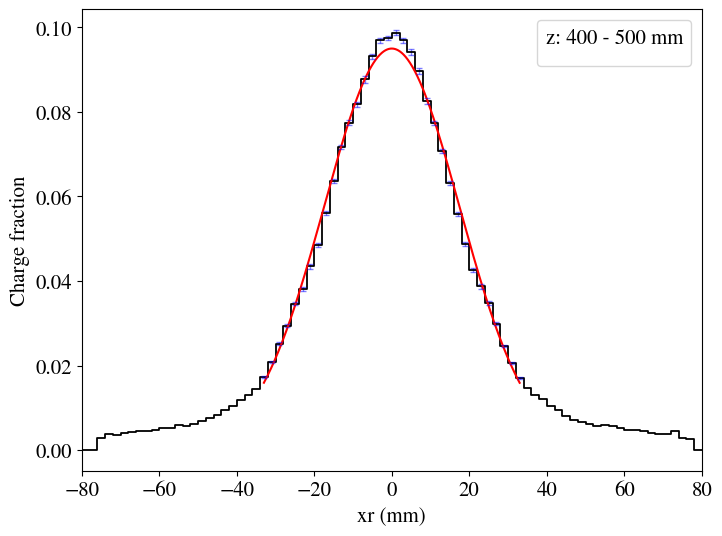

No handles with labels found to put in legend.
No handles with labels found to put in legend.


305.104996397944


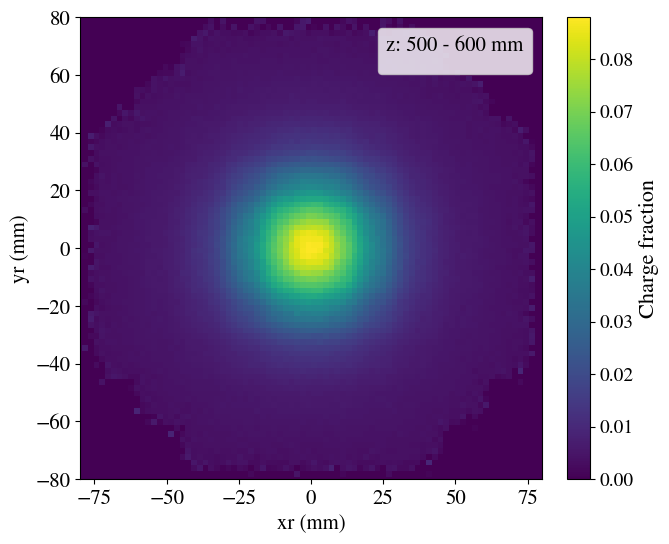

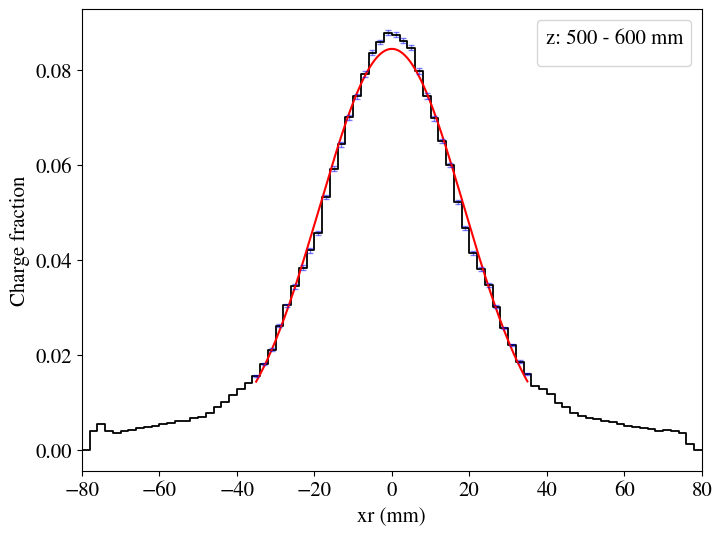

No handles with labels found to put in legend.
No handles with labels found to put in legend.


346.98058477872837


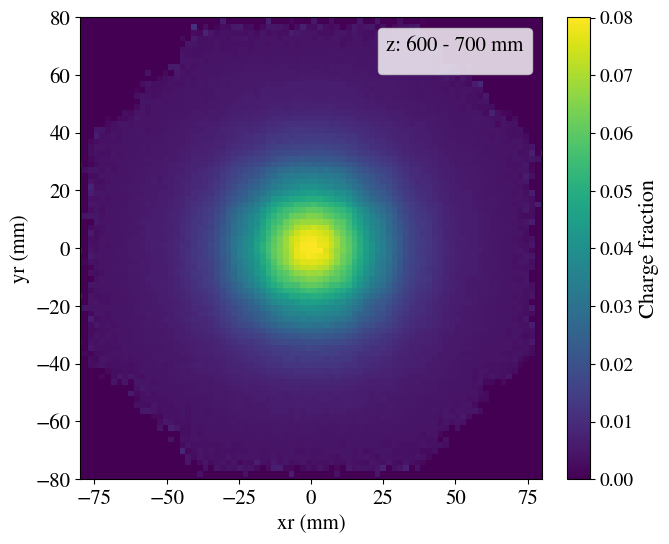

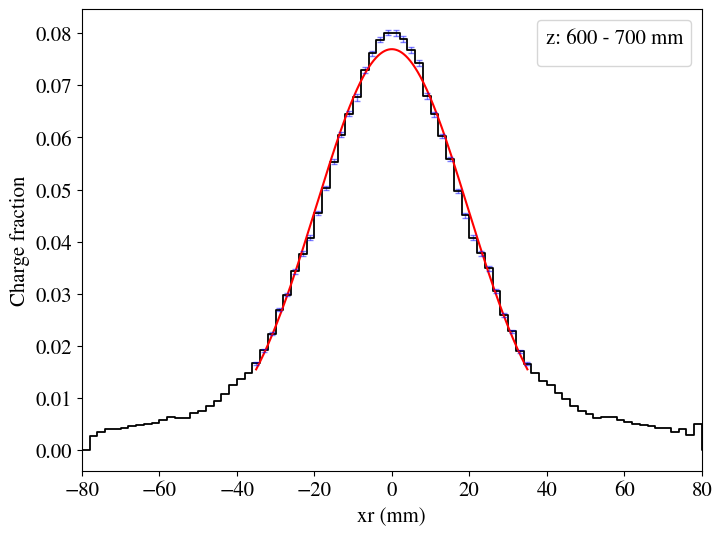

No handles with labels found to put in legend.
No handles with labels found to put in legend.


382.46722103008545


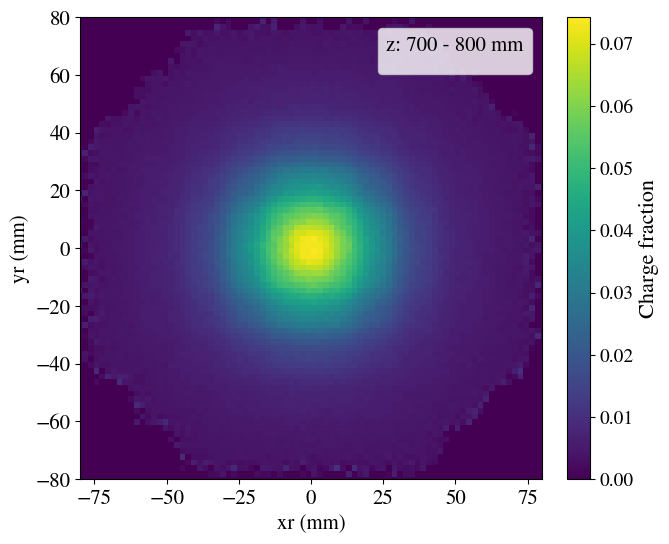

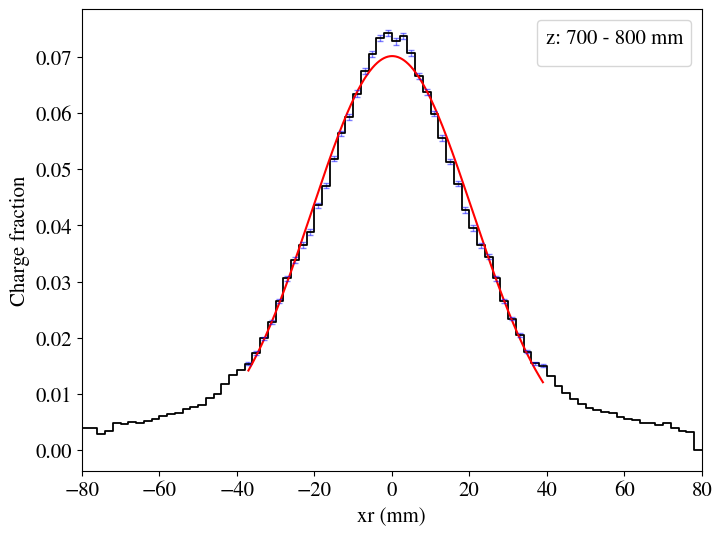

No handles with labels found to put in legend.
No handles with labels found to put in legend.


430.4628236701497


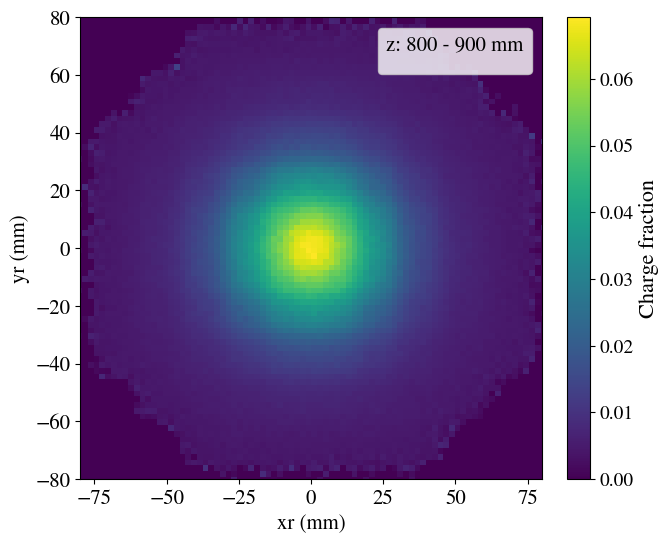

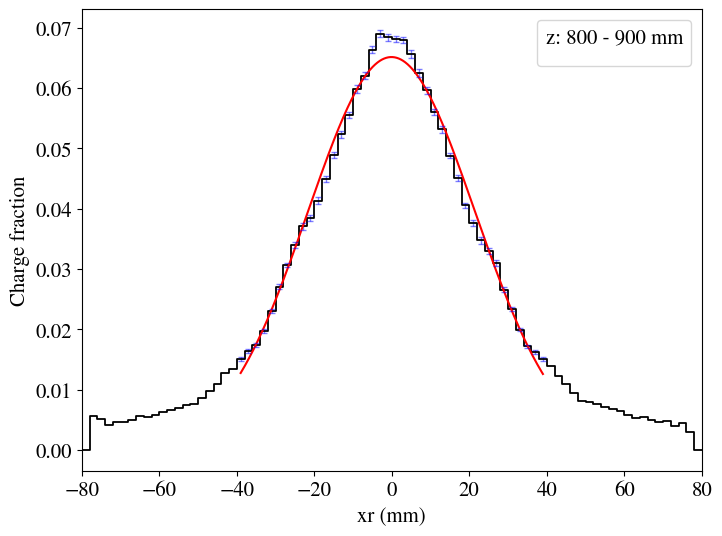

No handles with labels found to put in legend.
No handles with labels found to put in legend.


465.33932007722973


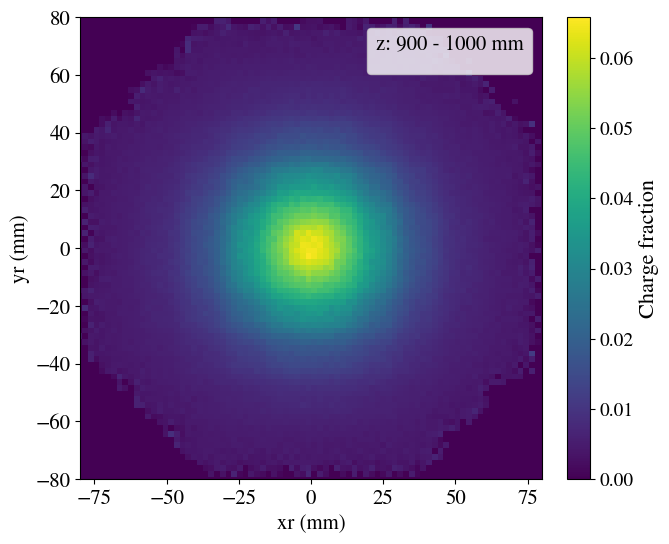

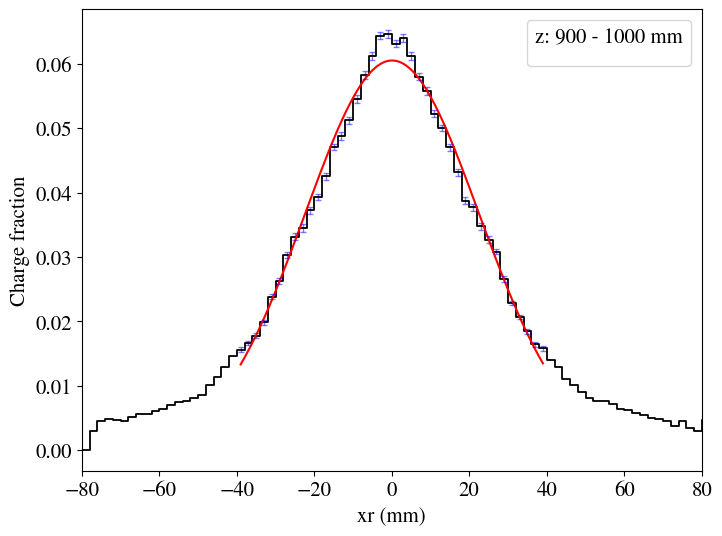

No handles with labels found to put in legend.
No handles with labels found to put in legend.


504.434364136858


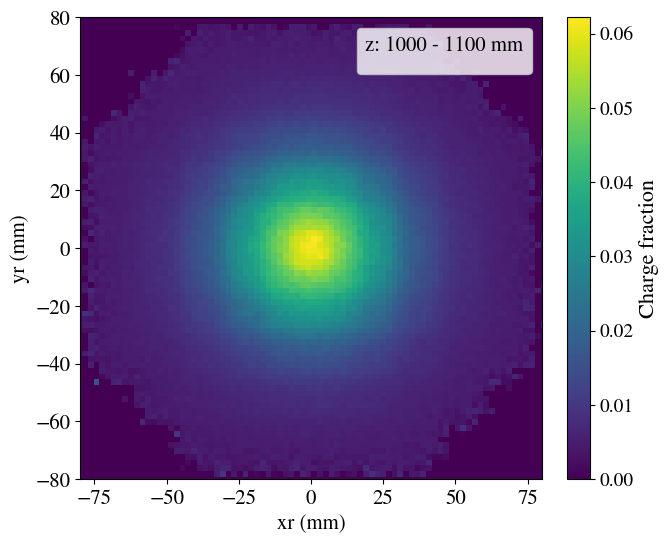

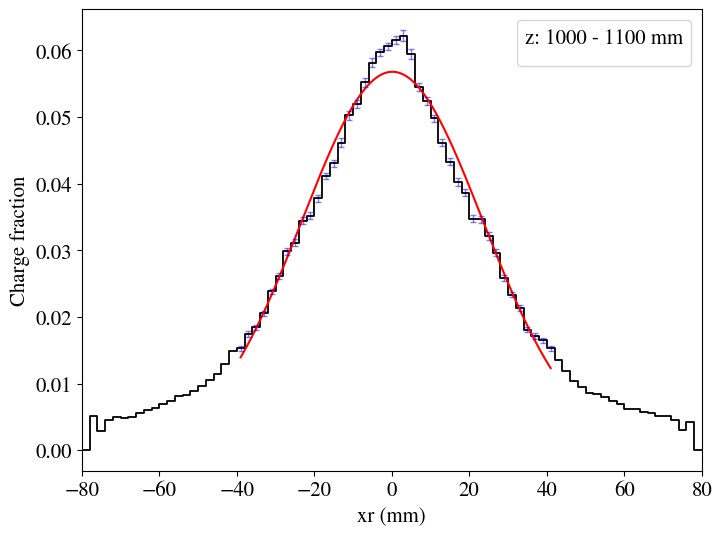

No handles with labels found to put in legend.
No handles with labels found to put in legend.


545.6602367065273


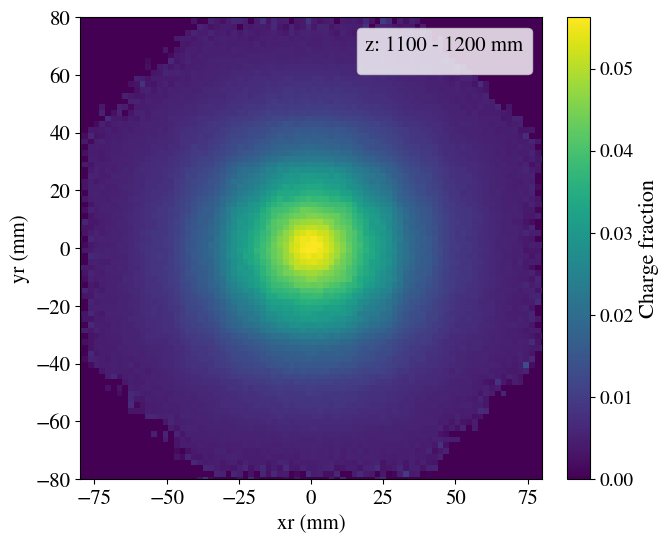

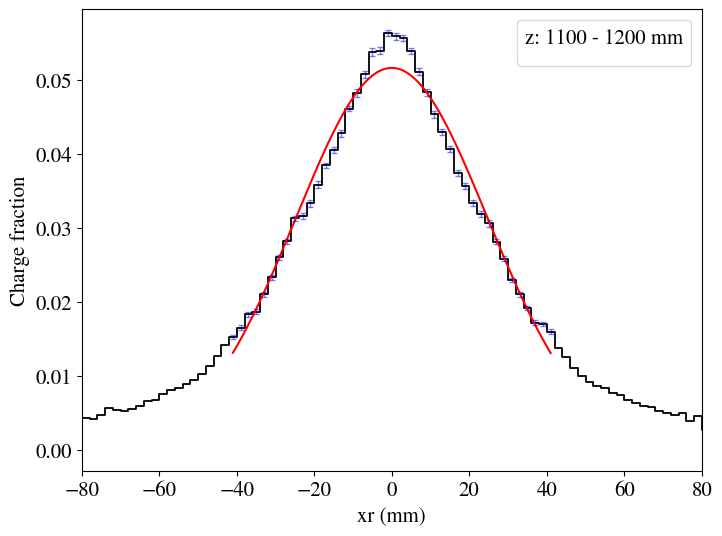

613.9139201093195


In [39]:
final_results = run_psfs(psf_15539)

[  0.17993958 118.79105624]


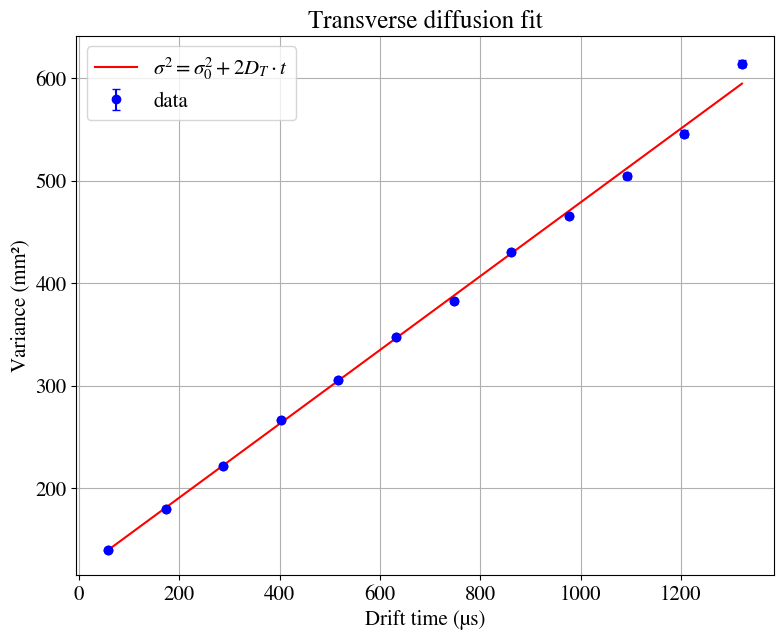

──────── diffusion fit results ────────
D_T       = 0.1799 ± 0.0005  mm²/µs
D_T^*     = 4005.00 ± 5.70  µs*sqrt(bar)/sqrt(cm)
sigma_0   = 118.79 ± 0.42    mm²
────────────────────────────────────────
Predicted D_T^* from Magboltz: ~4100 µs*sqrt(bar)/sqrt(cm)


(array([  0.17993958, 118.79105624]),
 array([[ 2.62269324e-07, -1.63087487e-04],
        [-1.63087487e-04,  1.74205352e-01]]))

In [40]:
drift_velocity = 0.87
final_results
  # mm / µs
cathode = 22997.2
gate = 8801.5
last_ring = 9046.7

def calculate_corrected_D_T(D_T, D_T_err):
    nominal_compressibility = 0.961
    compressibility_factor = 0.971
    drift_velocity = 0.87
    Pressure = 3.918
    Temperature = 293.15
    T_0 = 293.15
    # D_T in units of mm^2/mus
    # v_d in mm/mus

    # Convert D_T to mum^2/mus by multiplying by 1e6
    # Convert v_d to cm/mus by multiplying by 1e-1 

    corrected_D_T = (
        np.sqrt((T_0 / Temperature) * (nominal_compressibility / compressibility_factor) * (2 * Pressure * (D_T * 1e6) / (drift_velocity * 1e-1)))
    )

    corrected_D_T_err = 0.5 * corrected_D_T * D_T_err / D_T

    return corrected_D_T, corrected_D_T_err

def diffusion_transverse(drift_time, D_T, sigma_0):
    return sigma_0 + 2 * D_T * drift_time

def fit_diffusion(results_df):
    drift_time = results_df.z_value.to_numpy() / drift_velocity # µs
    variance = results_df.variance.to_numpy()
    variance_err = results_df.variance_err.to_numpy()

    # Fit
    p0 = [1.0, 1.0]
    popt, pcov = curve_fit(diffusion_transverse, drift_time, variance,  p0=p0, sigma=variance_err, absolute_sigma=True,)
    
    print(popt)
    
    D_T, sigma_0 = popt
    D_T_err, sigma_0_err = np.sqrt(np.diag(pcov))

    D_T_converted, D_T_err_converted = calculate_corrected_D_T(D_T, D_T_err)

    
    #D_T_err_converted = 0.5 * D_T_converted * D_T_err / D_T

    # Plot
    t_fit = np.linspace(drift_time.min(), drift_time.max(), 2000)
    plt.figure(figsize=(9, 7))
    plt.scatter(drift_time, variance, color="blue")
    plt.errorbar(drift_time, variance, yerr=variance_err, fmt='o', color='blue', capsize=3, label="data")
    plt.plot(t_fit, diffusion_transverse(t_fit, *popt), color="red",
             label=r"$\sigma^2 = \sigma_0^2 + 2 D_T \cdot t $")
    plt.xlabel("Drift time (µs)")
    plt.ylabel("Variance (mm²)")
    plt.title("Transverse diffusion fit")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print results
    print("──────── diffusion fit results ────────")
    print(f"D_T       = {D_T:.4f} ± {D_T_err:.4f}  mm²/µs")
    print(f"D_T^*     = {D_T_converted:.2f} ± {D_T_err_converted:.2f}  µs*sqrt(bar)/sqrt(cm)")
    print(f"sigma_0   = {sigma_0:.2f} ± {sigma_0_err:.2f}    mm²")
    print("────────────────────────────────────────")

    print("Predicted D_T^* from Magboltz: ~4100 µs*sqrt(bar)/sqrt(cm)")
    return popt, pcov

# Run the fit
fit_diffusion(final_results.iloc[0:])